Nome: Francisco Jerônimo da Silva Júnior <br>
Matrícula: 433399

# 1. Clusterização Hierárquica

In [1]:
# import libraries

# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# library of math
import math
# data visualization
from matplotlib import pyplot as plt 
# datasets
from sklearn import datasets

In [3]:
# Scikit Learning hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
# SciPy hierarchical clustering
from scipy.cluster import hierarchy

# kmeans
from sklearn.cluster import KMeans
# visualização de dados
import seaborn as sns

# DBSCAN
from sklearn.cluster import DBSCAN

## 1.1 Clusterização Hierárquica

Verifique abaixo o resultado da clusterização hierárquica variando a quantidade de clusters de forma iterativa. Teste também outras funções de ligação (linkage).

Fique livre parar alterar ou criar novos dados no dataset de exemplo abaixo.

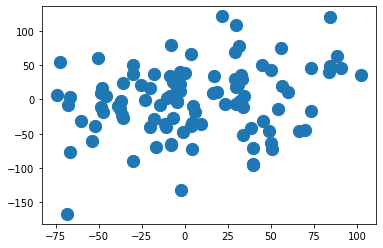

In [4]:
# Dataset
tmp_data = np.random.normal(0, 50, (100,2))

plt.scatter(tmp_data[:,0], tmp_data[:,1], s=150)
plt.show()

In [5]:
# Teste diferentes funções de ligações
# {“ward”, “complete”, “average”}
linkage = 'ward'

# Clusterização hierárquica
ag_model = AgglomerativeClustering(linkage=linkage)



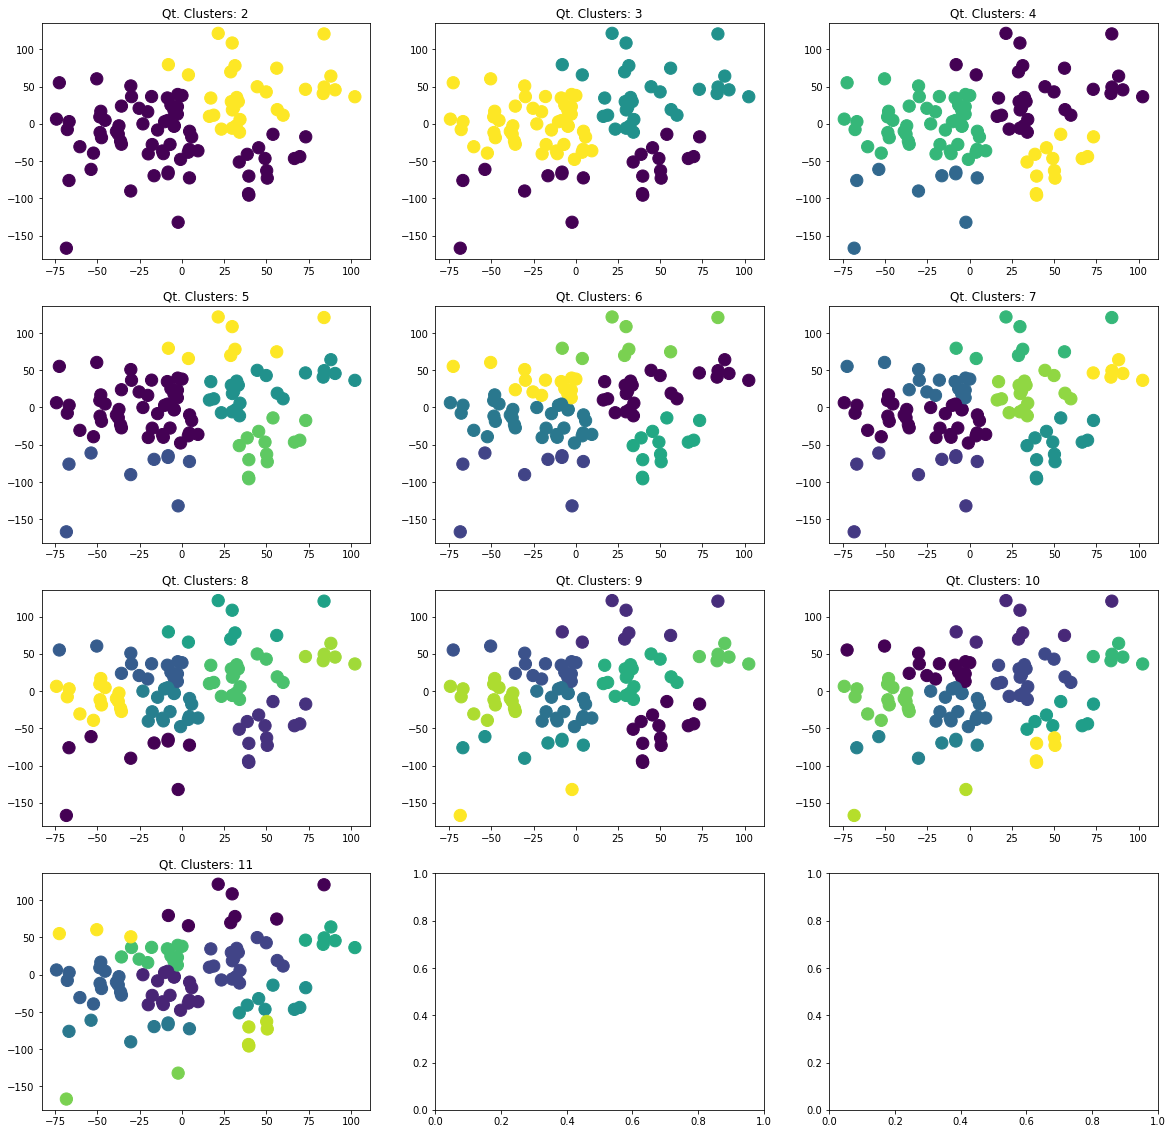

In [7]:
# Número de colunas do plot
plot_col = 3

n_rows = 4
n_col = 3
fig, ax = plt.subplots(nrows=int(n_rows*n_col/plot_col), 
                       ncols=plot_col,figsize=(20,20))

count = 0
for n_clusters in range(2,n_rows*n_col):
    index = abs(n_clusters - 2)
    
    # Atribui o número de clusters
    ag_model.n_clusters = n_clusters
    # Ajusta o modelo
    ag_model = ag_model.fit(tmp_data)
    
    if plot_col == 1:
        ax[count].scatter(tmp_data[:,0], tmp_data[:,1], c=ag_model.labels_, s=150)
        ax[count].set_title("Qt. Clusters: " + str(n_clusters))
    else:
        ax[count, (index)%plot_col].scatter(tmp_data[:,0], tmp_data[:,1], c=ag_model.labels_, s=150)
        ax[count, (index)%plot_col].set_title("Qt. Clusters: " + str(n_clusters))
    
    if (index+1) % plot_col == 0:
        count += 1     
        
plt.show()

# 1.2 Dendrograma

Um dendrograma é um tipo de diagrama de árvore que mostra o relacionamentos entre conjuntos de dados semelhantes, ou agrupamento hierárquico. Eles são freqüentemente usados em biologia para mostrar o agrupamento entre genes ou amostras, mas podem representar qualquer tipo de dados agrupados.
> https://www.statisticshowto.datasciencecentral.com/hierarchical-clustering/

Utilize o código abaixo para criar os Dendrogramas dos dados utilizados nas células acima. Fique livre para retornar e testar outras distribuições dos dados e funções de ligamento (linkage).

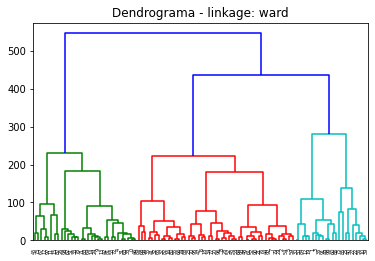

In [8]:
# Usa o método de linkage especificado 
# para construir o dendrograma
if (linkage == 'average'):
    Z = hierarchy.average(tmp_data)
elif (linkage == 'complete'):
    Z = hierarchy.complete(tmp_data)
elif (linkage == 'ward'):
    Z = hierarchy.ward(tmp_data)

plt.figure()
plt.title("Dendrograma - linkage: " + str(linkage))
dn = hierarchy.dendrogram(Z)

É possível fazer um teste de permutação para validar o número de clusters escolhidos, ou seja, verificar se realmente existe uma tendência não aleatória para os objetos se agruparem.

A técnica envolve testes estatísticos e pode ser estudado pelo material a seguir:
http://www.econ.upf.edu/~michael/stanford/maeb7.pdf

## 1.3 Exemplo 1 - Bolhas com diferentes variâncias

Observe a distribuição do dataset abaixo.

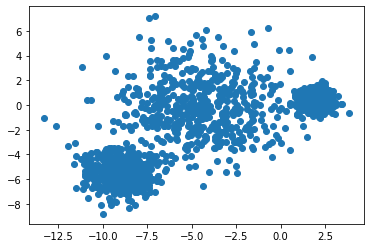

In [9]:
# blobs with varied variances
n_samples = 1500
random_state = 170
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
dataset_varied = varied[0]

plt.scatter(dataset_varied[:,0], dataset_varied[:,1])
plt.show()

Utilize o algoritmo do K-means para separa os conjuntos.

Você pode importar o K-means criado por você! Para importar uma função de um notebook para outro instale a biblioteca nbimporter:


In [10]:
# vai ser usado na plotagem dos modelos de clustering aglomerativo
def hierarchy_plot(data):
    x_, y_ = data[:, 0], data[:, 1]
    
    fig, axes = plt.subplots(2,2,  figsize=(16, 7))

    ag_model_ward = AgglomerativeClustering(linkage='ward')
    ag_model_ward.fit(data)
    sns.scatterplot(x=x_, y=y_, hue=ag_model_ward.labels_, ax=axes[0,0], palette='viridis');
    axes[0,0].set_title('Ward')

    ag_model_compl = AgglomerativeClustering(linkage='complete')
    ag_model_compl.fit(data)
    sns.scatterplot(x=x_, y=y_, hue=ag_model_compl.labels_, ax=axes[0,1], palette='viridis');
    axes[0,1].set_title('Complete')


    ag_model_avg = AgglomerativeClustering(linkage='average')
    ag_model_avg.fit(data)
    sns.scatterplot(x=x_, y=y_, hue=ag_model_avg.labels_, ax=axes[1,0], palette='viridis');
    axes[1,0].set_title('Average')

    ag_model_sg = AgglomerativeClustering(linkage='single')
    ag_model_sg.fit(data)
    sns.scatterplot(x=x_, y=y_, hue=ag_model_sg.labels_, ax=axes[1,1], palette='viridis');
    axes[1,1].set_title('Single');

### Criação dos modelos

In [11]:
# divisão em x e y
x_, y_ = dataset_varied[:,0], dataset_varied[:,1]

In [12]:
# criação dos modelos com a quantidade de clusters variando de 2 a 10
inercia, models = [], []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dataset_varied)
    models.append(kmeans)
    inercia.append(kmeans.inertia_)

### Método do Cotovelo

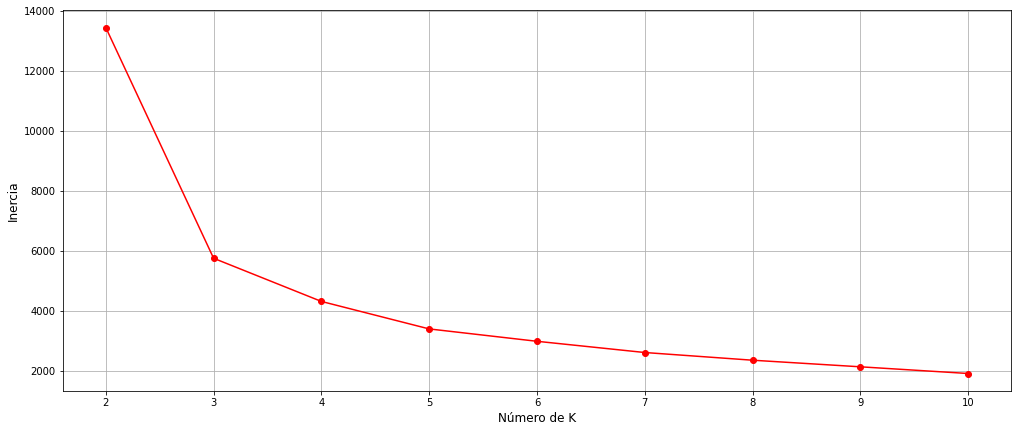

In [13]:
plt.figure(figsize=(17, 7))
plt.grid()
plt.plot(k_range, inercia, '-o', color='red');
plt.ylabel('Inercia', fontsize=12)
plt.xlabel('Número de K', fontsize=12);

In [14]:
# vou usar o modelo com 3 clusters
labels = models[1].labels_

### Plotagem dos clusters

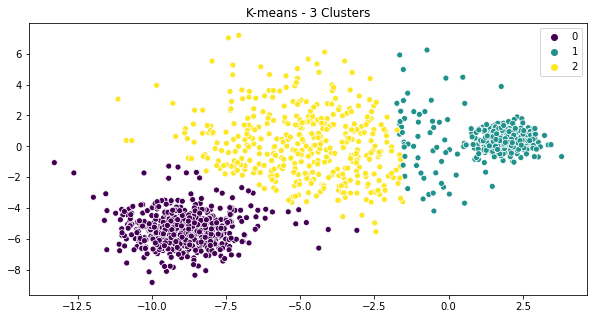

In [15]:
plt.figure(figsize=(10,5))
plt.title('K-means - 3 Clusters')
sns.scatterplot(x=x_, y=y_, hue=labels,  palette='viridis');

Os dados parecem estar agrupados corretamente? Tente fazer o mesmo procedimento com algoritmo de clusterização hieráquica 

Sim, com 3 clusters há uma boa separação dos dados.
> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

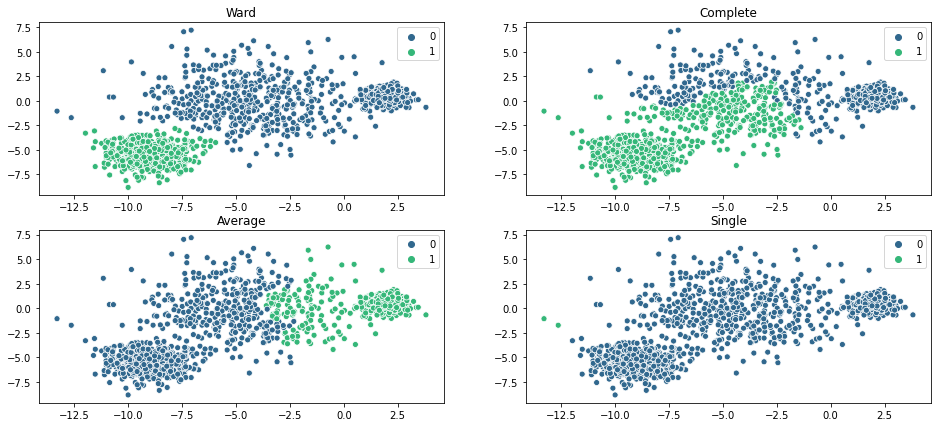

In [16]:
hierarchy_plot(dataset_varied)

Mostre e análise o dendrograma do exemplo acima.

In [17]:
# função para plotar os dendogramas
def dendo_plots(data):
    avg = hierarchy.average(data) 
    cmp = hierarchy.complete(data) 
    ward = hierarchy.ward(data) 
    
    plt.figure(figsize=(14, 7))
    r = hierarchy.dendrogram(avg)
    plt.figure(figsize=(14, 7))
    s = hierarchy.dendrogram(cmp)
    plt.figure(figsize=(14, 7))
    t = hierarchy.dendrogram(ward)

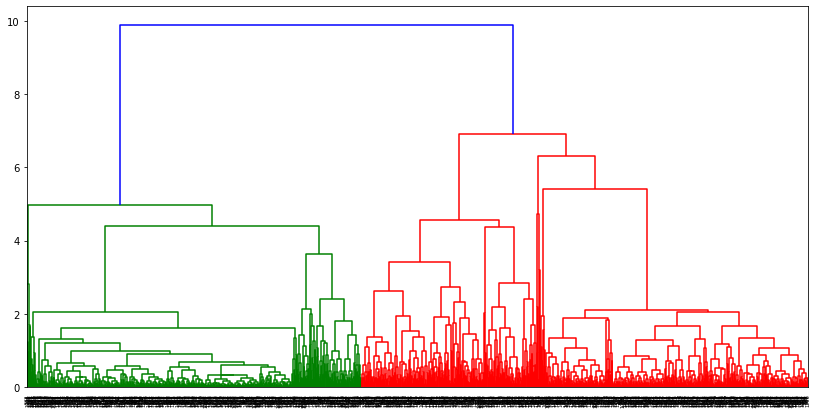

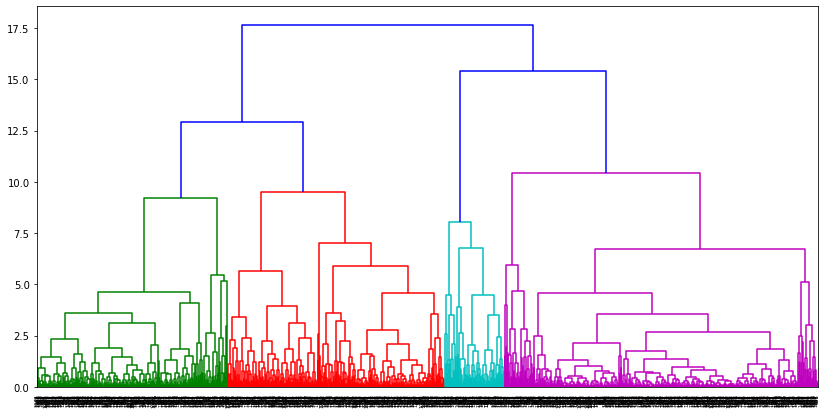

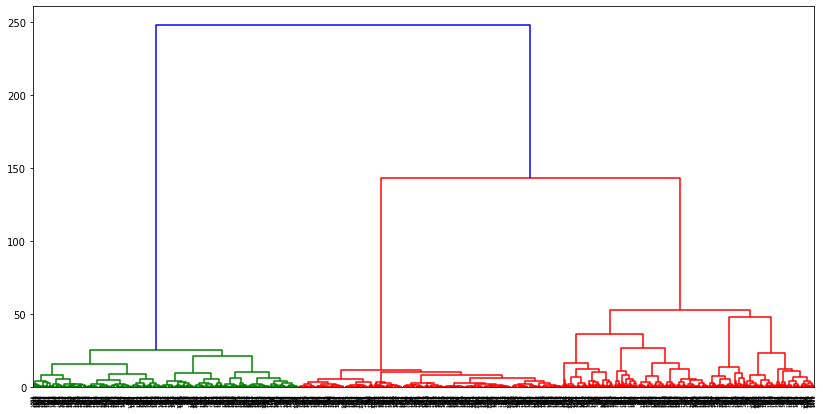

In [18]:
### CODE HERE ###
dendo_plots(dataset_varied)

## 1.4 Exemplo 2 - Noisy Circles

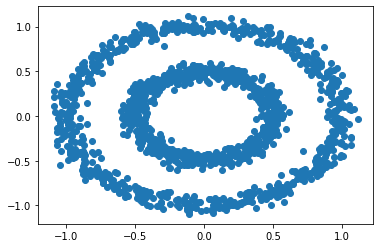

In [19]:
# Gerar o conjunto de dados
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
dataset_circles = noisy_circles[0]

# Mostrar os dados
plt.scatter(dataset_circles[:,0], dataset_circles[:,1])
plt.show()

Utilize o algoritmo do K-means para separa os conjuntos.

### Criação dos modelos

In [20]:
### CODE HERE ###
x_, y_ = dataset_circles[:,0], dataset_circles[:,1]

In [21]:
inercia, models = [], []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dataset_circles)
    models.append(kmeans)
    inercia.append(kmeans.inertia_)

### Método do cotovelo

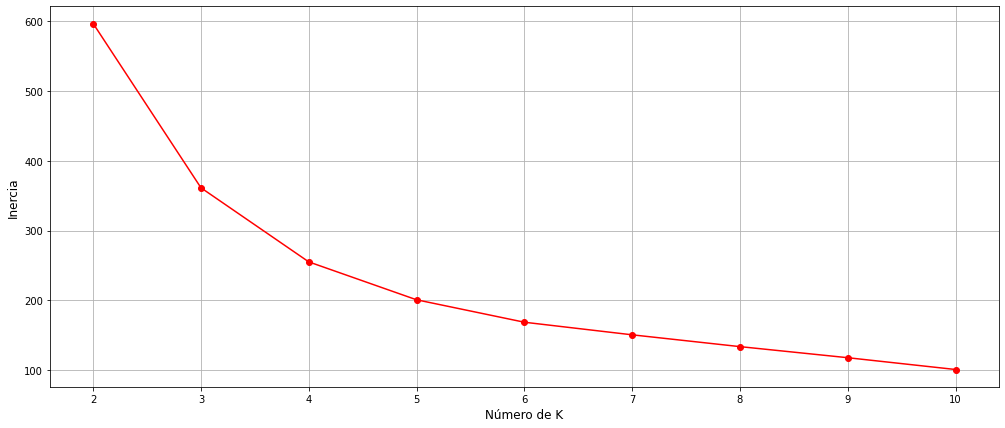

In [22]:
plt.figure(figsize=(17, 7))
plt.grid()
plt.plot(k_range, inercia, '-o', color='red');
plt.ylabel('Inercia', fontsize=12)
plt.xlabel('Número de K', fontsize=12);

### Plotagem dos clusters

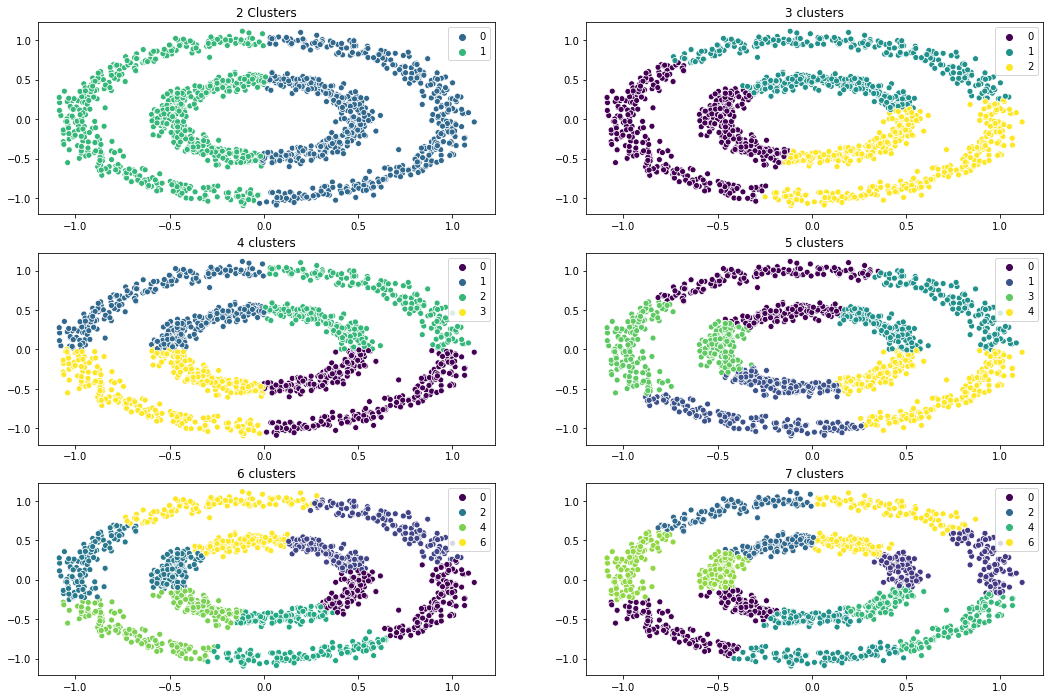

In [23]:
fig, axes = plt.subplots(3,2,  figsize=(18, 12))

sns.scatterplot(x=x_, y=y_, hue=models[0].labels_, ax=axes[0,0], palette='viridis');
axes[0,0].set_title('2 Clusters')

sns.scatterplot(x=x_, y=y_, hue=models[1].labels_, ax=axes[0,1], palette='viridis');
axes[0,1].set_title('3 clusters')

sns.scatterplot(x=x_, y=y_, hue=models[2].labels_, ax=axes[1,0], palette='viridis');
axes[1,0].set_title('4 clusters')

sns.scatterplot(x=x_, y=y_, hue=models[3].labels_, ax=axes[1,1], palette='viridis');
axes[1,1].set_title('5 clusters');

sns.scatterplot(x=x_, y=y_, hue=models[4].labels_, ax=axes[2,0], palette='viridis');
axes[2,0].set_title('6 clusters');

sns.scatterplot(x=x_, y=y_, hue=models[5].labels_, ax=axes[2,1], palette='viridis');
axes[2,1].set_title('7 clusters');

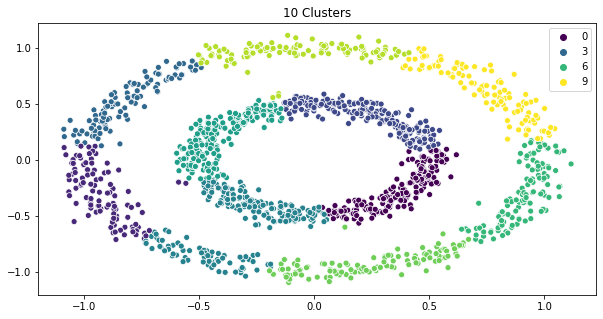

In [24]:
plt.figure(figsize=(10,5))
plt.title('10 Clusters')
sns.scatterplot(x=x_, y=y_, hue=models[8].labels_,  palette='viridis');

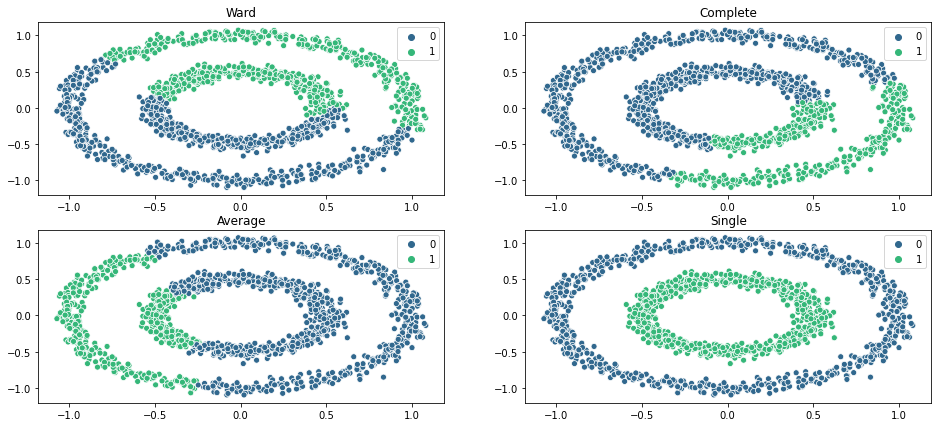

In [25]:
hierarchy_plot(dataset_circles)

Mostre e análise o dendrograma do exemplo acima.

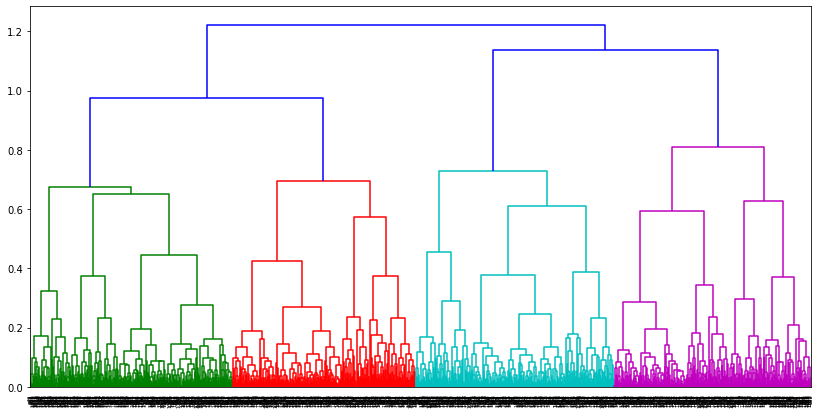

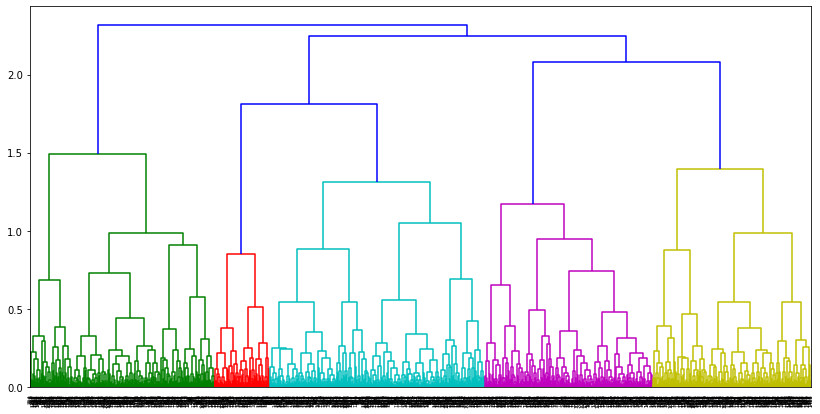

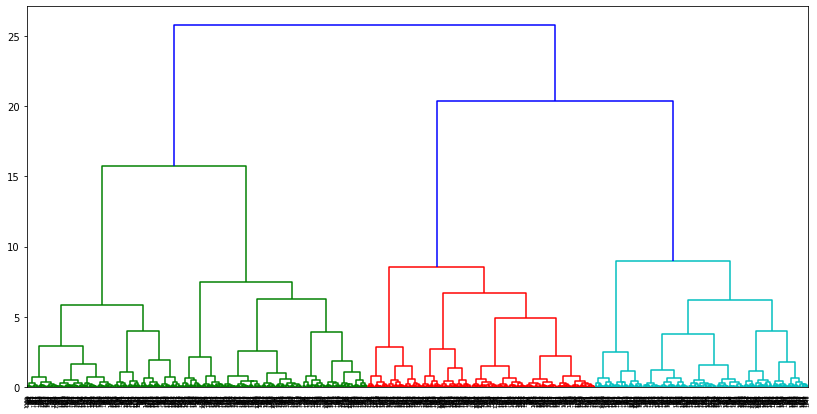

In [25]:
### CODE HERE ###
dendo_plots(dataset_circles)

Qual a sua conclusão?

"Escreva aqui"

O K-means não consegue lidar muito bem com dados globulares

# 2. DBSCAN

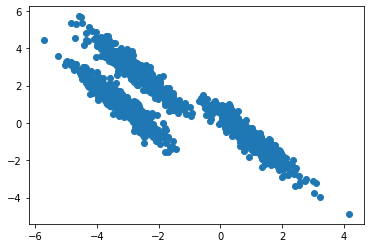

In [26]:
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
dataset = np.dot(X, transformation)

# Mostrar os dados
plt.scatter(dataset[:,0], dataset[:,1])
plt.show()

Clusterize os dados usando clusterização Hierárquica 

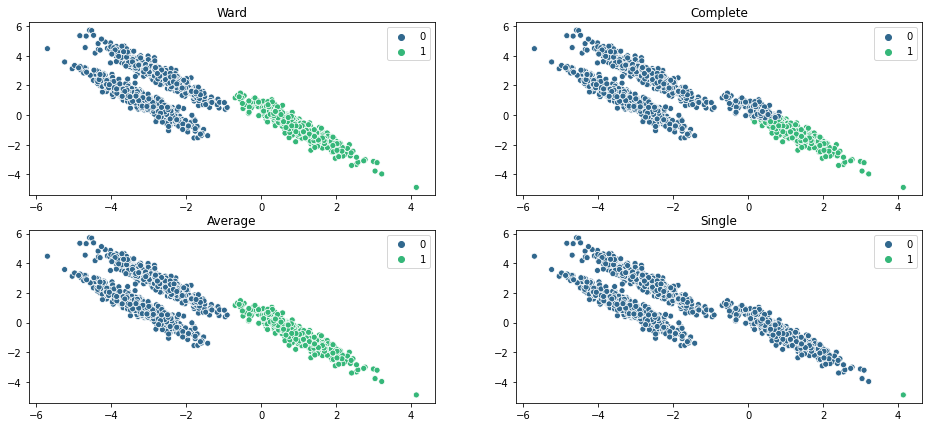

In [27]:
hierarchy_plot(dataset)

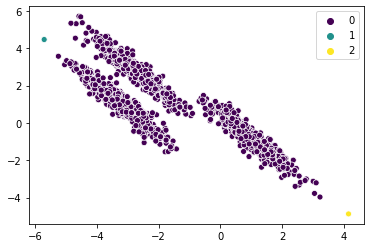

In [28]:
### CODE HERE ###
dbscan = DBSCAN(eps=1, min_samples=1)

dbscan.fit(dataset)

sns.scatterplot(x=dataset[:,0], y=dataset[:,1], hue=dbscan.labels_, palette='viridis');

Qual a sua conclusão?

O conjunto de dados está bem concentrado (com alta densidade).
Para **eps(raio de busca)** = 1 e **min_samples(número minimo de vizinhos dentro do raio)** = 2, apenas 2 pontos se desgarram um pouco e fogem do foco de densidade dos dados. O agrupamento pode variar a depender de quais valores de **eps** e **min_samples** assumirem, isto, é claro, depende de qual objetivo para o agrupamento. 